In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving PTRAIN.csv to PTRAIN.csv


In [6]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "PTRAIN.csv" with length 4397 bytes


In [7]:
uploaded

{'PTRAIN.csv': b'id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension\r\n1,M,23,12,151,954,0.143,0.278,0.242,0.079\r\n2,B,9,13,133,1326,0.143,0.079,0.181,0.057\r\n3,M,21,27,130,1203,0.125,0.16,0.207,0.06\r\n4,M,14,16,78,386,0.07,0.284,0.26,0.097\r\n5,M,9,19,135,1297,0.141,0.133,0.181,0.059\r\n6,B,25,25,83,477,0.128,0.17,0.209,0.076\r\n7,M,16,26,120,1040,0.095,0.109,0.179,0.057\r\n8,M,15,18,90,578,0.119,0.165,0.22,0.075\r\n9,M,19,24,88,520,0.127,0.193,0.235,0.074\r\n10,M,25,11,84,476,0.119,0.24,0.203,0.082\r\n11,M,24,21,103,798,0.082,0.067,0.153,0.057\r\n12,M,17,15,104,781,0.097,0.129,0.184,0.061\r\n13,B,14,15,132,1123,0.097,0.246,0.24,0.078\r\n14,M,12,22,104,783,0.084,0.1,0.185,0.053\r\n15,M,12,13,94,578,0.113,0.229,0.207,0.077\r\n16,M,22,19,97,659,0.114,0.16,0.23,0.071\r\n17,M,10,16,95,685,0.099,0.072,0.159,0.059\r\n18,M,15,14,108,799,0.117,0.202,0.216,0.074\r\n19,M,20,14,130,1260,0.098,0.103,0.158,0.054\r\n20,B,17,11,87,566,0.098,0.081,0

In [0]:
import io

In [9]:
train= pd.read_csv(io.StringIO(uploaded['PTRAIN.csv'].decode('utf-8')))
train.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


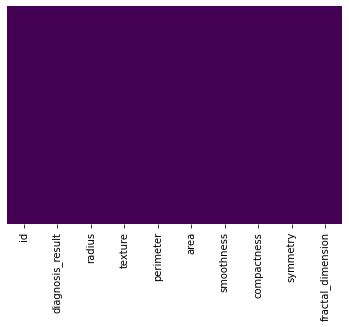

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
diag=pd.get_dummies(train['diagnosis_result'],drop_first=True)

In [0]:
train = pd.concat([train,diag],axis=1)

In [13]:
train.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,M
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079,1
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057,0
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060,1
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097,1
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059,1


In [0]:
train.drop('id',axis=1,inplace=True)

In [0]:
train.drop('diagnosis_result',axis=1,inplace=True)

In [16]:
train.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,M
0,23,12,151,954,0.143,0.278,0.242,0.079,1
1,9,13,133,1326,0.143,0.079,0.181,0.057,0
2,21,27,130,1203,0.125,0.160,0.207,0.060,1
3,14,16,78,386,0.070,0.284,0.260,0.097,1
4,9,19,135,1297,0.141,0.133,0.181,0.059,1


In [0]:
X= train.drop('M',axis=1)
Y= train['M']


In [18]:
X.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059


In [19]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: M, dtype: uint8

In [0]:
from sklearn.model_selection  import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(80, 8)
(20, 8)
(80,)
(20,)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler(feature_range = (0,1))

In [0]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
logmodel = LogisticRegression()

In [26]:
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(X_test)

In [28]:
predictions

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
      dtype=uint8)

In [0]:
from sklearn import metrics

In [0]:
accuracy=logmodel.score(X_test,Y_test)
accuracytrain=logmodel.score(X_train,Y_train)

In [31]:
print(accuracy*100)
print(accuracytrain*100)

80.0
90.0
